In [1]:
#importing all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

import re
import warnings

from sklearn.base import BaseEstimator, TransformerMixin
import random

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler, Normalizer

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

<div style="text-align:center; background-color:yellow; padding:20px;">
  <h2 style="font-size:36px; color:red;"><b>1.EDA (Explotary Data Analysis)</b></h2>
</div>


In [2]:
#loading the datasets

val_df = pd.read_csv('val.txt', sep=';', header=None, names=['Text', 'Emotion'])

test_df = pd.read_csv('test.txt', sep=';', header=None, names=['Text', 'Emotion'])

train_df = pd.read_csv('train.txt', sep=';', header=None, names=['Text', 'Emotion'])

train_df.info()
print('**********************************************************************************************')
test_df.info()
print('**********************************************************************************************')
val_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     16000 non-null  object
 1   Emotion  16000 non-null  object
dtypes: object(2)
memory usage: 250.1+ KB
**********************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     2000 non-null   object
 1   Emotion  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
**********************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     2000 non-null   object


## checking the shape of the dataset

In [3]:
train_df.shape

(16000, 2)

In [4]:
val_df.shape

(2000, 2)

In [5]:
test_df.shape

(2000, 2)

## checking for missing values

In [6]:
train_df.isna().sum()

Text       0
Emotion    0
dtype: int64

In [7]:
test_df.isna().sum()

Text       0
Emotion    0
dtype: int64

In [8]:
val_df.isna().sum()

Text       0
Emotion    0
dtype: int64

In [9]:
#removing duplicated values -- from training dataset a
index = train_df[train_df.duplicated() == True].index
train_df.drop(index, axis = 0, inplace = True)
train_df.reset_index(inplace=True, drop = True)

In [10]:
#print the rows which are duplicated (duplicated in the text but with different emotions)
train_df[train_df['Text'].duplicated() == True]

Text   Emotion
5067   i feel on the verge of tears from weariness i ...       joy
6133               i still feel a craving for sweet food      love
6563   i tend to stop breathing when i m feeling stre...     anger
7623   i was intensely conscious of how much cash i h...   sadness
7685   im still not sure why reilly feels the need to...  surprise
8246   i am not amazing or great at photography but i...      love
9596   ive also made it with both sugar measurements ...       joy
9687   i had to choose the sleek and smoother feel of...       joy
9769   i often find myself feeling assaulted by a mul...   sadness
9786        i feel im being generous with that statement       joy
10117  i feel pretty tortured because i work a job an...      fear
10581                       i feel most passionate about       joy
11273  i was so stubborn and that it took you getting...       joy
11354  i write these words i feel sweet baby kicks fr...      love
11525  i feel a remembrance of the strange by justin ...      fear
11823  i have chose for myself that makes me feel ama...       joy
12441                   i still feel completely accepted      love
12562                           i feel so weird about it  surprise
12892  i cant escape the tears of sadness and just tr...       joy
13236   i feel like a tortured artist when i talk to her     anger
13879  i feel like i am very passionate about youtube...      love
14106                             i feel kind of strange  surprise
14313    i could feel myself hit this strange foggy wall  surprise
14633  i feel pretty weird blogging about deodorant b...      fear
14925  i resorted to yesterday the post peak day of i...      fear
15314  i will feel as though i am accepted by as well...       joy
15328  i shy away from songs that talk about how i fe...       joy
15571  i bet taylor swift basks in the knowledge that...     anger
15704  i began to feel accepted by gaia on her own terms       joy
15875  i was sitting in the corner stewing in my own ...     anger

In [11]:
#print some of those rows to check
train_df[train_df['Text'] == train_df.iloc[9687]['Text']]

Text Emotion
4776  i had to choose the sleek and smoother feel of...    love
9687  i had to choose the sleek and smoother feel of...     joy

In [12]:
#print the rows which are duplicated (duplicated in the text but with different emotions)
train_df[train_df['Text'].duplicated() == True]

Text   Emotion
5067   i feel on the verge of tears from weariness i ...       joy
6133               i still feel a craving for sweet food      love
6563   i tend to stop breathing when i m feeling stre...     anger
7623   i was intensely conscious of how much cash i h...   sadness
7685   im still not sure why reilly feels the need to...  surprise
8246   i am not amazing or great at photography but i...      love
9596   ive also made it with both sugar measurements ...       joy
9687   i had to choose the sleek and smoother feel of...       joy
9769   i often find myself feeling assaulted by a mul...   sadness
9786        i feel im being generous with that statement       joy
10117  i feel pretty tortured because i work a job an...      fear
10581                       i feel most passionate about       joy
11273  i was so stubborn and that it took you getting...       joy
11354  i write these words i feel sweet baby kicks fr...      love
11525  i feel a remembrance of the strange by justin ...      fear
11823  i have chose for myself that makes me feel ama...       joy
12441                   i still feel completely accepted      love
12562                           i feel so weird about it  surprise
12892  i cant escape the tears of sadness and just tr...       joy
13236   i feel like a tortured artist when i talk to her     anger
13879  i feel like i am very passionate about youtube...      love
14106                             i feel kind of strange  surprise
14313    i could feel myself hit this strange foggy wall  surprise
14633  i feel pretty weird blogging about deodorant b...      fear
14925  i resorted to yesterday the post peak day of i...      fear
15314  i will feel as though i am accepted by as well...       joy
15328  i shy away from songs that talk about how i fe...       joy
15571  i bet taylor swift basks in the knowledge that...     anger
15704  i began to feel accepted by gaia on her own terms       joy
15875  i was sitting in the corner stewing in my own ...     anger

In [13]:
#removing duplicated text 
index = train_df[train_df['Text'].duplicated() == True].index
train_df.drop(index, axis = 0, inplace = True)
train_df.reset_index(inplace=True, drop = True)

In [14]:
train_df.duplicated().sum()

0

In [15]:
test_df.duplicated().sum()

0

In [16]:
val_df.duplicated().sum()

0

In [17]:
#Count the number of stopwords in the data
temp =train_df.copy()
stop_words = set(stopwords.words("english"))
temp['stop_words'] = temp['Text'].apply(lambda x: len(set(x.split()) & set(stop_words)))
temp.stop_words.value_counts()


# The data contains alot of stopwords (some rows contains more than 25 stopword!) so, we need to take care when we remove them as some rows may become empty

stop_words
5     1416
7     1405
6     1392
4     1341
8     1319
3     1263
9     1177
10    1048
2      922
11     889
12     752
13     644
14     493
1      450
15     376
16     265
17     238
18     164
19     113
20      90
0       79
21      60
22      33
23      19
24       7
25       6
26       6
28       1
29       1
Name: count, dtype: int64

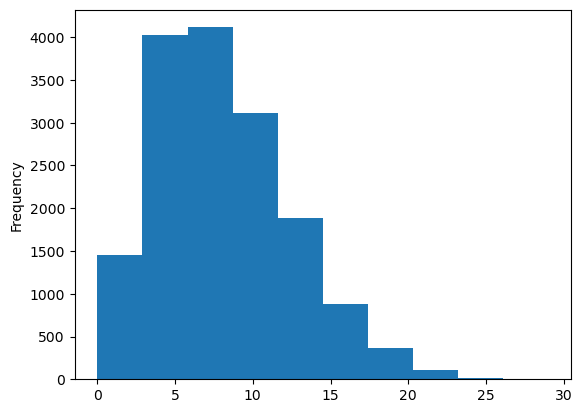

<Figure size 640x480 with 0 Axes>

In [18]:
#distribution of stopwords visually
temp['stop_words'].plot(kind= 'hist')
plt.show()
plt.savefig("distribution of stopwords visually.png", bbox_inches='tight')  # Save as PNG with tight bounding box



## Checking for unique and value count of emotions

In [19]:
train_df['Emotion'].unique()#we have 6 unique emotions type in the dataset

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [20]:
val_df['Emotion'].value_counts()

Emotion
joy         704
sadness     550
anger       275
fear        212
love        178
surprise     81
Name: count, dtype: int64

In [21]:
train_df['Emotion'].value_counts()

Emotion
joy         5350
sadness     4664
anger       2155
fear        1933
love        1299
surprise     568
Name: count, dtype: int64

In [22]:
test_df['Emotion'].value_counts()

Emotion
joy         695
sadness     581
anger       275
fear        224
love        159
surprise     66
Name: count, dtype: int64

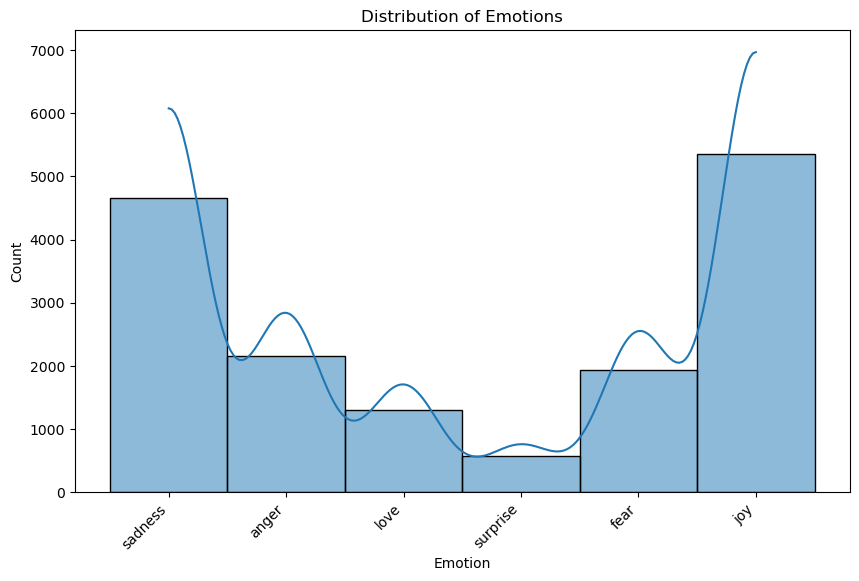

In [23]:
 # Histogram plot for emotion distribution with KDE
plt.figure(figsize=(10, 6))
sns.histplot(x='Emotion', data=train_df, kde=True, palette='Set2', element='bars',
stat='count',
common_norm=False)
plt.title('Distribution of Emotions')
plt.xticks(rotation=45, ha='right')
plt.show()
#plt.savefig("train_emotion_distribution using kse.png", bbox_inches='tight')  # Save as PNG with tight bounding box



                                       Train Dataset Emotion Distribution                                       


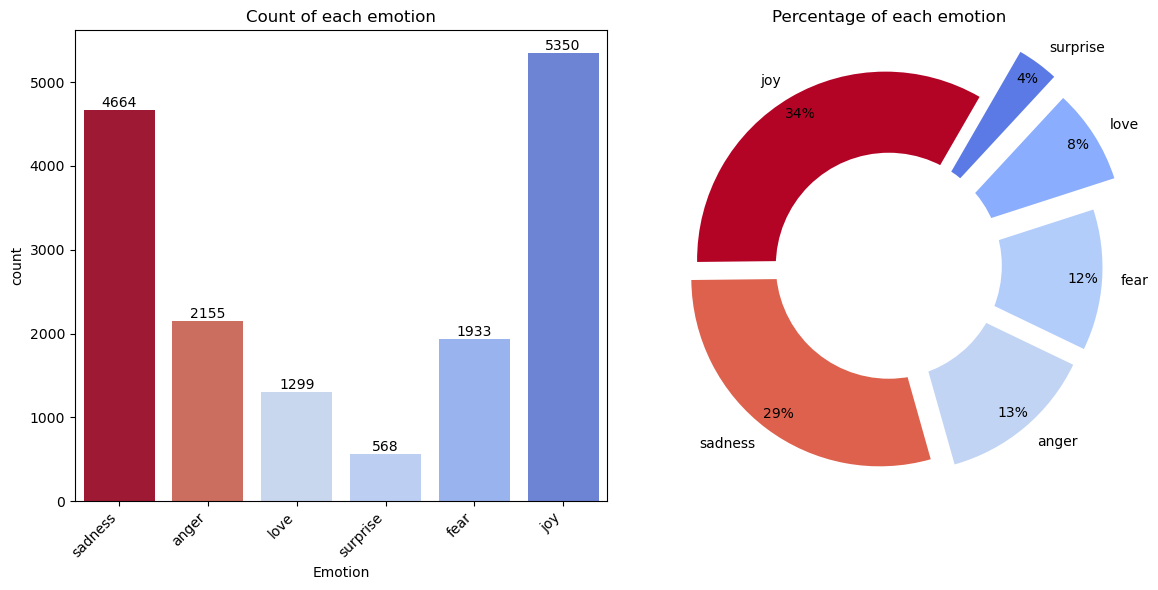

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def plotting(df):
  """
  Creates a combined plot with a pie chart and a bar chart for emotion distribution analysis.

  Args:
      df (pandas.DataFrame): DataFrame containing an 'Emotion' column.
  """

  col = 'Emotion'
  fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

  # Pie Chart Data with Specific Colors (Adjust as needed)
  explode = list((np.array(list(df[col].dropna().value_counts())) / sum(list(df[col].dropna().value_counts())))[::-1])
  sizes = df[col].value_counts()
  labels = sizes.index

  # Colormap for pie chart slices
  cmap = plt.cm.get_cmap('coolwarm')  # Adjust colormap as desired

  # Use sizes directly for color assignment (fixing the error)
  colors = cmap(sizes / sizes.max())

  # Create pie chart with color customization and potential line/text adjustments
  ax2.pie(sizes, explode=explode, startangle=60, labels=labels, autopct='%1.0f%%', pctdistance=0.9, colors=colors)

  # Add white center circle
  center_circle = plt.Circle((0, 0), 0.6, fc='white')
  ax2.add_artist(center_circle)

  # Create bar chart with color palette and potential bar/text adjustments
  sns.countplot(x=col, data=df, ax=ax1, palette=colors)
  plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels 
  ax1.bar_label(ax1.containers[0])  # Add labels on top of bars 
  # Subplot Titles
  ax1.set_title("Count of each emotion")
  ax2.set_title("Percentage of each emotion")

  # Add main title for the entire plot
#   fig.suptitle('Train Dataset Emotions Distribution', fontsize=16)  # Adjust title size as needed

  plt.tight_layout()
  plt.show()
 # plt.savefig("train_emotion_distribution.png", bbox_inches='tight')  # Save as PNG with tight bounding box

from termcolor import colored
heading="Train Dataset Emotion Distribution"
centered_heading=colored(heading,attrs=['bold']).center(120)
print(centered_heading)

# plotting dataframe
plotting(train_df)



                                       Test Dataset Emotion Distribution                                        


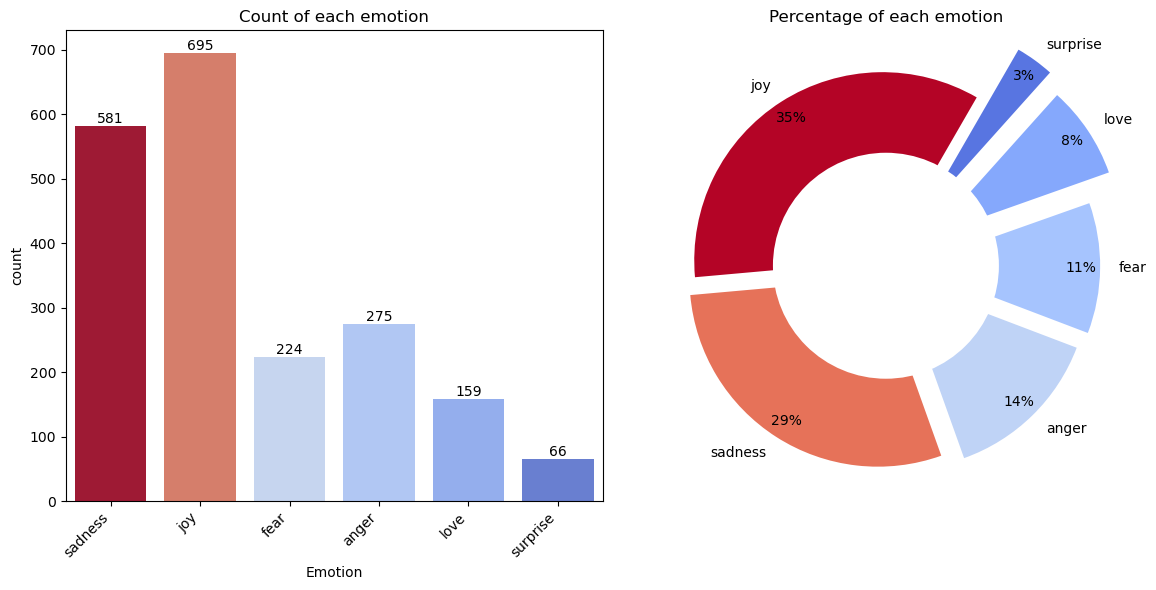

In [25]:
heading="Test Dataset Emotion Distribution"
centered_heading=colored(heading,attrs=['bold']).center(120)
print(centered_heading)

# plotting dataframe
plotting(test_df)


###                                        validation Dataset Emotions Distribution

                                    validation Dataset Emotion Distribution                                     


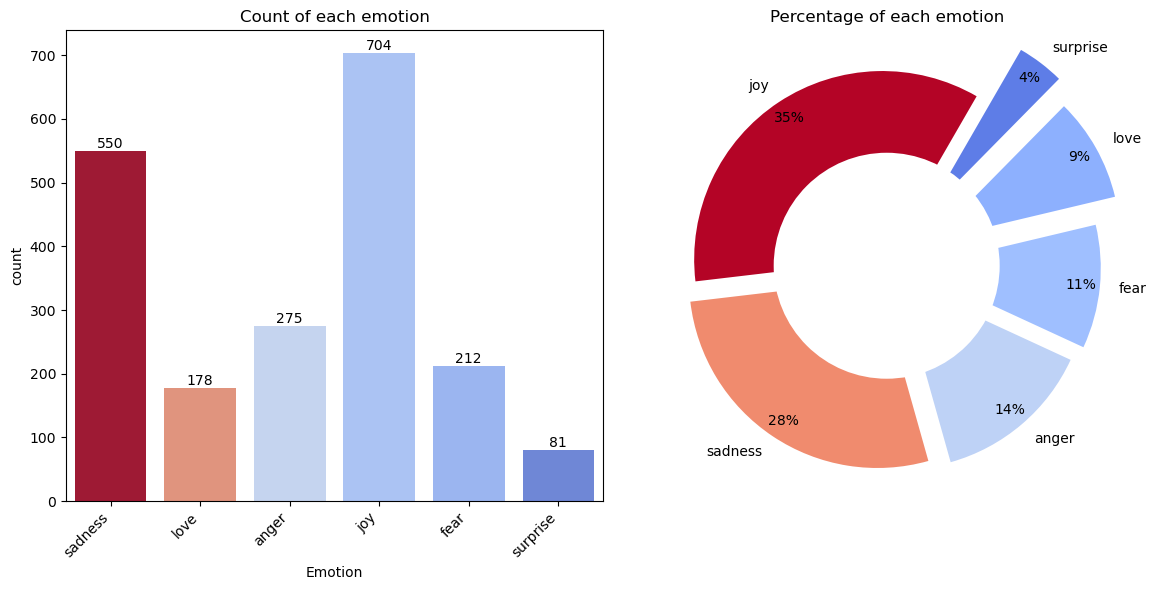

In [26]:
heading="validation Dataset Emotion Distribution"
centered_heading=colored(heading,attrs=['bold']).center(120)
print(centered_heading)

# plotting dataframe
plotting(val_df)


In [27]:
from collections import Counter
import plotly.express as px

def plot_word_frequency(df, title):
  """
  Creates a word frequency bar chart with data labels and color customization using plotly express.

  Args:
      df (pandas.DataFrame): DataFrame containing a 'Text' column.
      title (str): Title for the plot.
  """

  text = ' '.join(df['Text'].values)
  words = text.split()
  word_counts = Counter(words)
  common_words = word_counts.most_common(20)
  words, counts = zip(*common_words)

  # Define a color list (adjust as needed)
  colors = px.colors.sequential.Viridis  # Choose a color scale from Plotly Express

  fig = px.bar(
      x=counts,  # Horizontal bar for frequency
      y=words,  # Words on vertical axis
      orientation='h',  # Horizontal bars
      title=title,
      labels={'x': 'Frequency', 'y': 'Words'},
      color=counts,  # Map color to frequency
      color_continuous_scale=colors  # Apply chosen color scale
  )

  # Add data labels (adjust position and format as needed)
  fig.update_traces(text=counts, textposition='auto')

  # Customize appearance (optional)
  # fig.update_layout(...)  # Explore plotly layout options

  fig.show()
  #fig.write_image("word_frequency_distribution.png")  # Write as PNG image

# Call the function with your DataFrames
plot_word_frequency(train_df, 'Word Frequency Distribution in Training Set')
plot_word_frequency(test_df, 'Word Frequency Distribution in Test Set')
plot_word_frequency(val_df, 'Word Frequency Distribution in Validation Set')



## Dataset description

In [28]:
train_df.head()

Text  Emotion
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...     love
4                               i am feeling grouchy    anger

In [29]:
test_df.head()

Text  Emotion
0  im feeling rather rotten so im not very ambiti...  sadness
1          im updating my blog because i feel shitty  sadness
2  i never make her separate from me because i do...  sadness
3  i left with my bouquet of red and yellow tulip...      joy
4    i was feeling a little vain when i did this one  sadness

In [30]:
val_df.head()

Text  Emotion
0  im feeling quite sad and sorry for myself but ...  sadness
1  i feel like i am still looking at a blank canv...  sadness
2                     i feel like a faithful servant     love
3                  i am just feeling cranky and blue    anger
4  i can have for a treat or if i am feeling festive      joy

### Here We will count the percentage of each category in each data frame

 # Feature engineering 

Emotion
joy         35.20
sadness     27.50
anger       13.75
fear        10.60
love         8.90
surprise     4.05
Name: proportion, dtype: float64
***********************************************************************
Emotion
joy         33.502411
sadness     29.206588
anger       13.494896
fear        12.104703
love         8.134511
surprise     3.556891
Name: proportion, dtype: float64
***********************************************************************
Emotion
joy         34.75
sadness     29.05
anger       13.75
fear        11.20
love         7.95
surprise     3.30
Name: proportion, dtype: float64


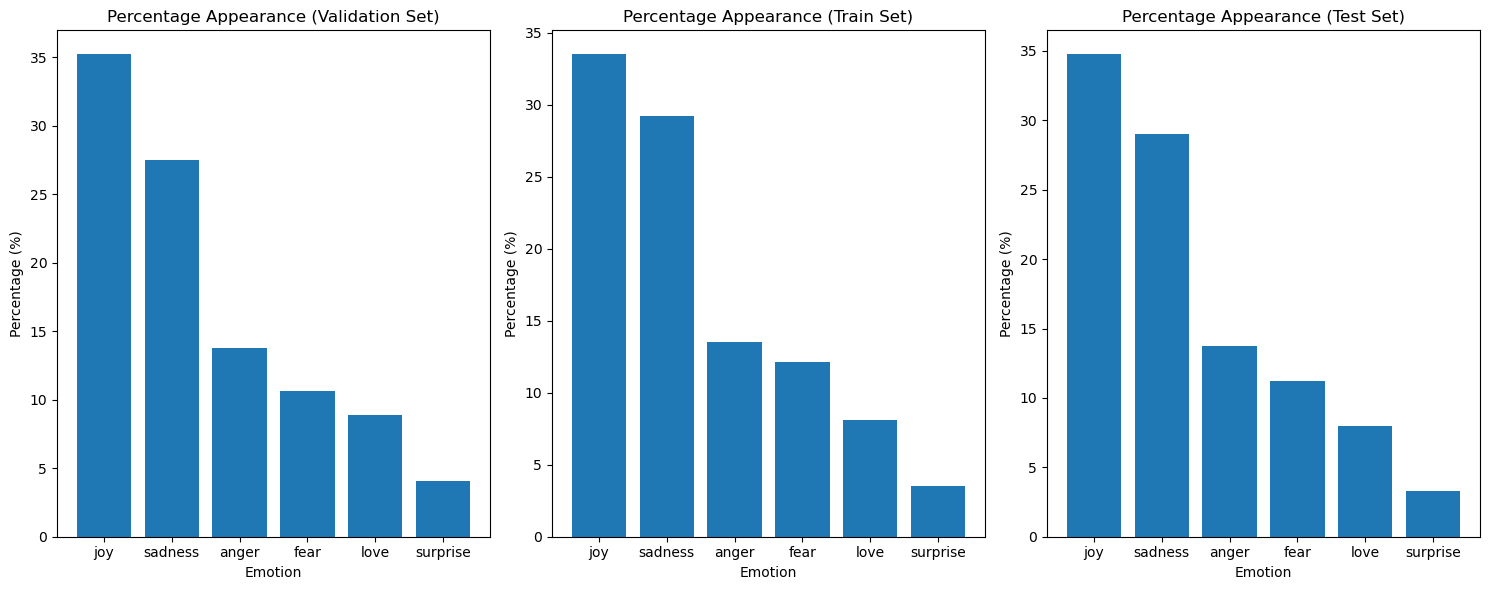

In [31]:
percentage_appearance_1= val_df['Emotion'].value_counts(normalize=True) * 100

print(percentage_appearance_1)

print('***********************************************************************')
percentage_appearance_2= train_df['Emotion'].value_counts(normalize=True) * 100

print(percentage_appearance_2)

print('***********************************************************************')
percentage_appearance_3 = test_df['Emotion'].value_counts(normalize=True) * 100

print(percentage_appearance_3)

# Create a single figure with subplots for each DataFrame
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 6))  # Adjust figure size as needed

# Plot for val_df
ax1.bar(percentage_appearance_1.index, percentage_appearance_1.values)
ax1.set_title('Percentage Appearance (Validation Set)')
ax1.set_xlabel('Emotion')
ax1.set_ylabel('Percentage (%)')

# Plot for train_df (similar for ax2 and ax3)
ax2.bar(percentage_appearance_2.index, percentage_appearance_2.values)
ax2.set_title('Percentage Appearance (Train Set)')
ax2.set_xlabel('Emotion')
ax2.set_ylabel('Percentage (%)')

# Plot for test_df
ax3.bar(percentage_appearance_3.index, percentage_appearance_3.values)
ax3.set_title('Percentage Appearance (Test Set)')
ax3.set_xlabel('Emotion')
ax3.set_ylabel('Percentage (%)')

# Adjust layout and save as image
plt.tight_layout()
#plt.savefig("emotion_percentage_distribution.png", bbox_inches='tight')  # Save as PNG
plt.show()


### It seems like "love" and "surprise" have low representation, likely due to data scarcity. Removing these emotions could enhance model performance and make this unbalanced dataset to balanced.

In [32]:
val_df = val_df.drop(val_df[(val_df['Emotion'] == 'surprise') | (val_df['Emotion'] == 'love')].index)
test_df = test_df.drop(test_df[(test_df['Emotion'] == 'surprise') | (test_df['Emotion'] == 'love')].index)
train_df = train_df.drop(train_df[(train_df['Emotion'] == 'surprise') | (train_df['Emotion'] == 'love')].index)
train_df['Emotion'].value_counts()

Emotion
joy        5350
sadness    4664
anger      2155
fear       1933
Name: count, dtype: int64

In [33]:
# make the data balanced we used sampling to pevent from biasness

In [34]:
joy = train_df[train_df['Emotion'] == 'joy'].sample(n=2200, random_state=20)
sad = train_df[train_df['Emotion'] == 'sadness'].sample(n=2200, random_state=20)
fear = train_df[train_df['Emotion'] == 'fear'].sample(n=1933, random_state=20)
anger = train_df[train_df['Emotion'] == 'anger'].sample(n=2155, random_state=20)

df_sampled = pd.concat([joy, sad, fear, anger])

train_df = df_sampled.sample(frac=1, random_state=20).reset_index(drop=True)

In [35]:
train_df.Emotion.value_counts()

Emotion
joy        2200
sadness    2200
anger      2155
fear       1933
Name: count, dtype: int64

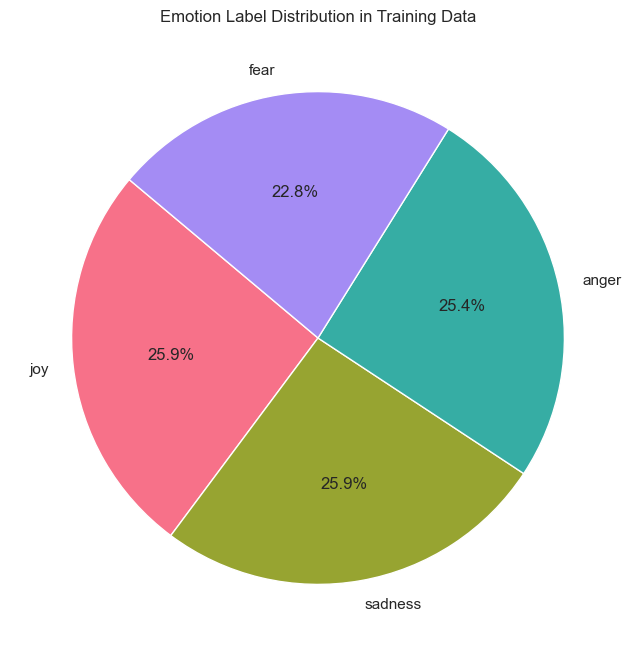

In [36]:
# Count label distributions
label_counts = train_df['Emotion'].value_counts()
light_colors = sns.husl_palette(n_colors=len(label_counts))
sns.set(style="whitegrid")
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=light_colors)
plt.title('Emotion Label Distribution in Training Data')
plt.show()
#plt.savefig("train_emotion_label_distribution.png", bbox_inches='tight')

In [37]:
val_df.Emotion.value_counts()

Emotion
joy        704
sadness    550
anger      275
fear       212
Name: count, dtype: int64

In [38]:
val_df = val_df[~val_df['Emotion'].str.contains('love')]
val_df = val_df[~val_df['Emotion'].str.contains('surprise')]

In [39]:
joy = val_df[val_df['Emotion'] == 'joy'].sample(n=250, random_state=20)
sad = val_df[val_df['Emotion'] == 'sadness'].sample(n=250, random_state=20)
fear = val_df[val_df['Emotion'] == 'fear'].sample(n=212, random_state=20)
anger = val_df[val_df['Emotion'] == 'anger'].sample(n=275, random_state=20)

df_sampled = pd.concat([joy, sad, fear, anger])

val_df = df_sampled.sample(frac=1, random_state=20).reset_index(drop=True)

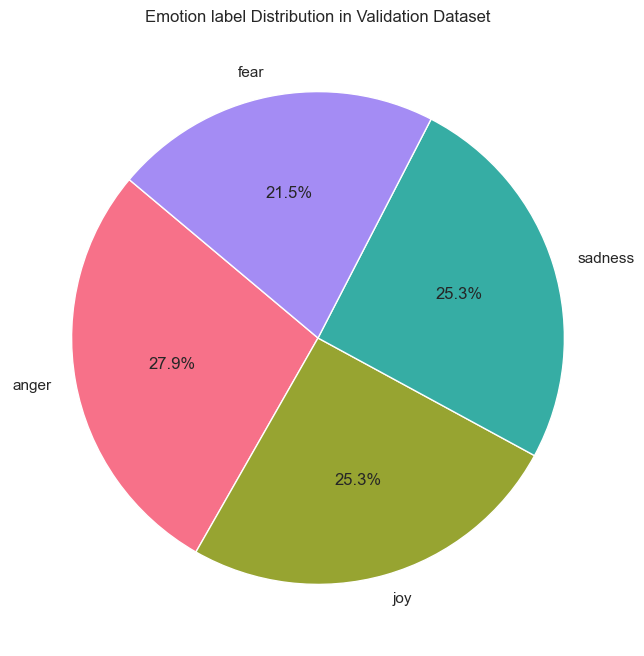

In [40]:
# Count label distributions
label_counts = val_df['Emotion'].value_counts()
light_colors = sns.husl_palette(n_colors=len(label_counts))
sns.set(style="whitegrid")
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=light_colors)
plt.title('Emotion label Distribution in Validation Dataset')
plt.show()
#plt.savefig("val_emotion_percentage_distribution.png", bbox_inches='tight')

In [41]:
test_df.Emotion.value_counts()

Emotion
joy        695
sadness    581
anger      275
fear       224
Name: count, dtype: int64

In [42]:
test_df = test_df[~test_df['Emotion'].str.contains('love')]
test_df = test_df[~test_df['Emotion'].str.contains('surprise')]

In [43]:
joy = test_df[test_df['Emotion'] == 'joy'].sample(n=250, random_state=20)
sad = test_df[test_df['Emotion'] == 'sadness'].sample(n=250, random_state=20)
fear = test_df[test_df['Emotion'] == 'fear'].sample(n=224, random_state=20)
anger = test_df[test_df['Emotion'] == 'anger'].sample(n=275, random_state=20)

df_sampled = pd.concat([joy, sad, fear, anger])

test_df = df_sampled.sample(frac=1, random_state=20).reset_index(drop=True)

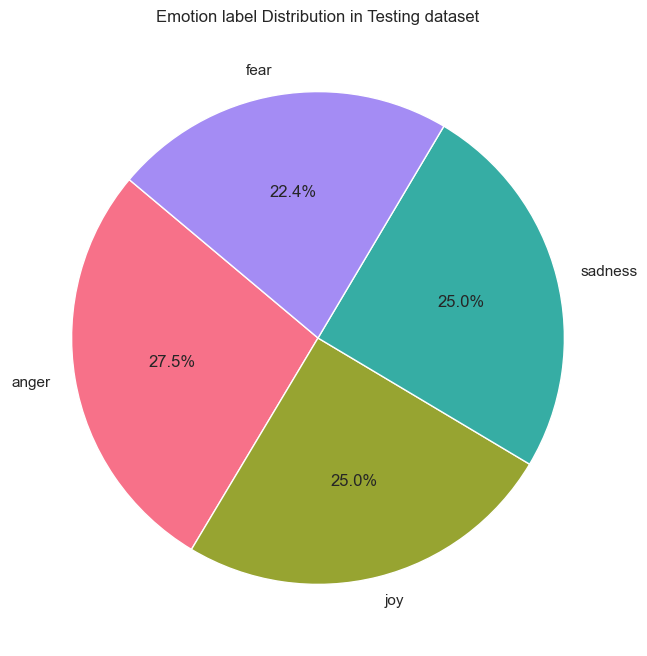

In [44]:
# Count label distributions
label_counts = test_df['Emotion'].value_counts()
light_colors = sns.husl_palette(n_colors=len(label_counts))
sns.set(style="whitegrid")
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=light_colors)
plt.title('Emotion label Distribution in Testing dataset')
plt.show()
#plt.savefig("test_emotion_percentage_distribution.png", bbox_inches='tight')

### In this step we will get the text with the maximum length and it's emotion

In [45]:
val_df['text_length'] = val_df['Text'].apply(len)
idx_max_length = val_df['text_length'].idxmax()
emo = val_df.loc[idx_max_length, 'Emotion']
txt = val_df.loc[idx_max_length, 'Text']

print('***********************************************************************')
print('the text is: ' + txt)

print('***********************************************************************')
print('the emotion is: ' + emo)


***********************************************************************
the text is: im not really terrified of childbirth this time around and even though i know no matter what unexpectedly pops up you really can survive it and even though the author of my baby planner would be beaming with pride that i followed her instructions to the letter im still feeling a bit uncertain
***********************************************************************
the emotion is: fear


In [47]:
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sweet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### This is a Text Processing class that take any text and convert it to a lower case and stemming it as the user is need.

<div style="text-align:center; background-color:YELLOW; padding:20px;">
  <h1 style="font-size:36px; color:RED;"><b>2.Text Processing </b></h1>
</div>


In [48]:
"""
def text_processing(text):
    text = re.sub('[^a-zA-Z]', ' ', text) # remove any non-alphabet characters
    text = text.lower()
    text = text.split()
    ps = PorterStemmer()
    text = [ps.stem(word) for word in text if word not in set(stopwords.words('english'))]
    text = ' '.join(text)
    return text


class TextProcessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return [text_processing(text) for text in X]
"""
class TextProcessor(BaseEstimator, TransformerMixin):
    def __init__(self, lower=False, stem=False):
        self.lower = lower
        self.stem = stem
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        def text_processing(text):
            processed_text = re.sub('[^a-zA-Z]', ' ', text) # remove any non-alphabet characters
            if self.lower:
                processed_text = processed_text.lower()
            processed_text = processed_text.split()
            if self.stem:
                ps = PorterStemmer()
                processed_text = [ps.stem(word) for word in processed_text if word not in set(stopwords.words('english'))]
            processed_text = ' '.join(processed_text)
            return processed_text
        
        return [text_processing(text) for text in X]



### I've developed a confusion matrix function to evaluate classification model performance using input features X_data and corresponding labels Y_data. 
#### NOTE: The diagonal of the matrix represents correct predictions, while off-diagonal elements indicate misclassifications.

In [49]:
def plot_confusion_matrices(train_true, train_pred, val_true, val_pred, test_true, test_pred, labels):
    # Create confusion matrices
    train_conf_matrix = confusion_matrix(train_true, train_pred)
    val_conf_matrix = confusion_matrix(val_true, val_pred)
    test_conf_matrix = confusion_matrix(test_true, test_pred)

    # Plot confusion matrices
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Train Confusion Matrix
    sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='YlGnBu', 
                xticklabels=labels, yticklabels=labels, ax=axes[0])
    axes[0].set_title('Train Confusion Matrix')
    axes[0].set_xlabel('Predicted')
    axes[0].set_ylabel('True')

    # Validation Confusion Matrix
    sns.heatmap(val_conf_matrix, annot=True, fmt='d', cmap='YlGnBu', 
                xticklabels=labels, yticklabels=labels, ax=axes[1])
    axes[1].set_title('Validation Confusion Matrix')
    axes[1].set_xlabel('Predicted')
    axes[1].set_ylabel('True')

    # Test Confusion Matrix
    sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='YlGnBu', 
                xticklabels=labels, yticklabels=labels, ax=axes[2])
    axes[2].set_title('Test Confusion Matrix')
    axes[2].set_xlabel('Predicted')
    axes[2].set_ylabel('True')

    plt.tight_layout()
    plt.show()

<div style="text-align:center; background-color:YELLOW; padding:20px;">
  <h1 style="font-size:36px; color:RED;"><b>3.Models Comparison </b></h1>
</div>


### Here we create a pipline that contains:
### 1.Text Processing for the input data
### 2.Victorizing the text column
### 3.Take an object of Random Forest Classifier 
### After the pipline is created We fit the model

In [50]:
from sklearn.ensemble import RandomForestClassifier

text_processor = TextProcessor(lower=True, stem=False)
vectorizer = CountVectorizer(max_features=3000)
RF = RandomForestClassifier(
    n_estimators=50, random_state=42, n_jobs=-1, verbose=1
)

pipeline = Pipeline([
    ("text_processing", text_processor), # Text processing step
    ("vectorizer", CountVectorizer()),   # CountVectorizer step
    ("classifier", RF)  # RandomForestClassifier step
])

pipeline.fit(train_df['Text'], train_df['Emotion'])


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   15.3s finished


Pipeline(steps=[('text_processing', TextProcessor(lower=True)),
                ('vectorizer', CountVectorizer()),
                ('classifier',
                 RandomForestClassifier(n_estimators=50, n_jobs=-1,
                                        random_state=42, verbose=1))])


### In the following code block, we preprocess the text data for training, testing, and validation datasets to ensure that the data frames are formatted correctly, facilitating accurate predictions.

In [51]:
process_pip = Pipeline(
    [
        ("text_processing", text_processor),
    ]
)

x_train_procceced = process_pip.fit_transform(train_df['Text'])
x_test_procceced = process_pip.transform(test_df['Text'])
x_val_procceced = process_pip.transform(val_df['Text'])

# In the following code we predict the Y-hat for each x data frame

In [52]:
train_pred = pipeline.predict(x_train_procceced)
train_accuracy = accuracy_score(train_df['Emotion'], train_pred)
print("Train set accuracy:", train_accuracy)

# Validation set accuracy
val_pred = pipeline.predict(x_val_procceced)
val_accuracy = accuracy_score(val_df['Emotion'], val_pred)
print("Validation set accuracy:", val_accuracy)

# Test set accuracy
test_pred = pipeline.predict(x_test_procceced)
test_accuracy = accuracy_score(test_df['Emotion'], test_pred)
print("Test set accuracy:", test_accuracy)

RF_acc = test_accuracy


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished


Train set accuracy: 0.9998821866163996
Validation set accuracy: 0.8915906788247214
Test set accuracy: 0.913913913913914


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished


In [53]:
from termcolor import colored
heading="Random Forest Classifier"
centered_heading=colored(heading,attrs=['bold']).center(80)
print(centered_heading)


report1 = classification_report(train_df['Emotion'], train_pred)
report2 = classification_report(test_df['Emotion'], test_pred)
report3 = classification_report(val_df['Emotion'], val_pred)
print("classification report of train data\n",report1)
print("^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^")
print("classification report of test data \n",report2)
print("^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^")
print("classification report of val data\n",report3)

                        Random Forest Classifier                        
classification report of train data
               precision    recall  f1-score   support

       anger       1.00      1.00      1.00      2155
        fear       1.00      1.00      1.00      1933
         joy       1.00      1.00      1.00      2200
     sadness       1.00      1.00      1.00      2200

    accuracy                           1.00      8488
   macro avg       1.00      1.00      1.00      8488
weighted avg       1.00      1.00      1.00      8488

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
classification report of test data 
               precision    recall  f1-score   support

       anger       0.91      0.94      0.93       275
        fear       0.91      0.94      0.93       224
         joy       0.90      0.95      0.93       250
     sadness       0.93      0.82      0.87       250

    accuracy                           0.91     

### this is a confusion matricies to provide an insights about the predicted values

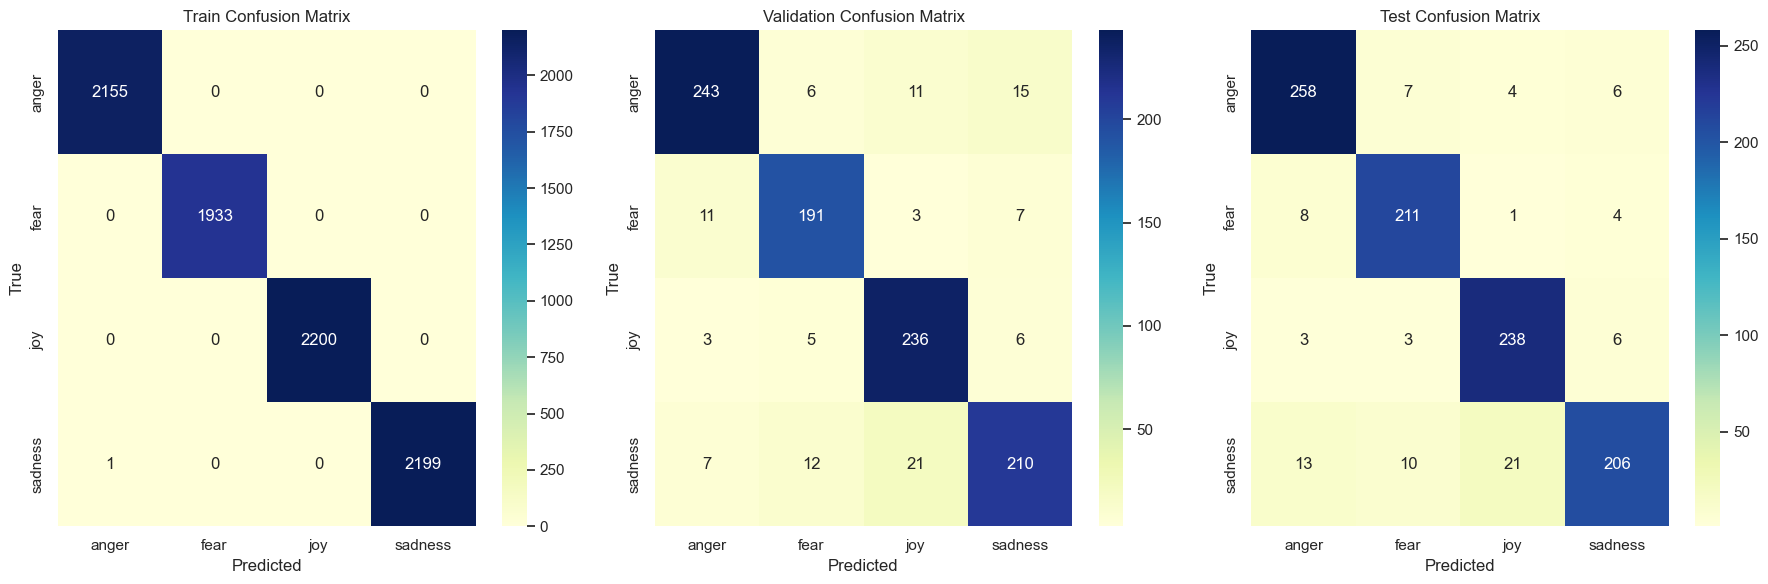

In [54]:
plot_confusion_matrices(
    train_df['Emotion'], train_pred,
    val_df['Emotion'], val_pred,
    test_df['Emotion'], test_pred,
    pipeline.classes_
)

In [55]:
from sklearn.svm import SVC
text_processor = TextProcessor(lower=True, stem=False)
vectorizer = CountVectorizer(max_features=3000)
svm = SVC(kernel="linear",gamma=1, C=.5, random_state=42)
svm_pipeline = Pipeline(
    [
        ("text_processing", text_processor),
        ("vectorizer", vectorizer),
        ("svm", svm),
    ]
)
svm_pipeline.fit(train_df['Text'], train_df['Emotion']) 

Pipeline(steps=[('text_processing', TextProcessor(lower=True)),
                ('vectorizer', CountVectorizer(max_features=3000)),
                ('svm', SVC(C=0.5, gamma=1, kernel='linear', random_state=42))])

In [56]:
train_pred = svm_pipeline.predict(x_train_procceced)
train_accuracy = accuracy_score(train_df['Emotion'], train_pred)
print("Train set accuracy:", train_accuracy)

# Validation set accuracy
val_pred = svm_pipeline.predict(x_val_procceced)
val_accuracy = accuracy_score(val_df['Emotion'], val_pred)
print("Validation set accuracy:", val_accuracy)

# Test set accuracy
test_pred = svm_pipeline.predict(x_test_procceced)
test_accuracy = accuracy_score(test_df['Emotion'], test_pred)
print("Test set accuracy:", test_accuracy)

svm_acc= test_accuracy

Train set accuracy: 0.9835061262959472
Validation set accuracy: 0.9078014184397163
Test set accuracy: 0.924924924924925


In [57]:
heading="Support vector Classifier"
centered_heading=colored(heading,attrs=['bold']).center(80)
print(centered_heading)


report1 = classification_report(train_df['Emotion'], train_pred)
report2 = classification_report(test_df['Emotion'], test_pred)
report3 = classification_report(val_df['Emotion'], val_pred)
print("classification report of train data\n",report1)
print("^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^")
print("classification report of test data \n",report2)
print("^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^")
print("classification report of val data\n",report3)

                       Support vector Classifier                        
classification report of train data
               precision    recall  f1-score   support

       anger       0.97      0.99      0.98      2155
        fear       0.98      0.99      0.98      1933
         joy       0.99      0.99      0.99      2200
     sadness       0.99      0.97      0.98      2200

    accuracy                           0.98      8488
   macro avg       0.98      0.98      0.98      8488
weighted avg       0.98      0.98      0.98      8488

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
classification report of test data 
               precision    recall  f1-score   support

       anger       0.91      0.94      0.93       275
        fear       0.91      0.91      0.91       224
         joy       0.93      0.98      0.96       250
     sadness       0.94      0.86      0.90       250

    accuracy                           0.92     

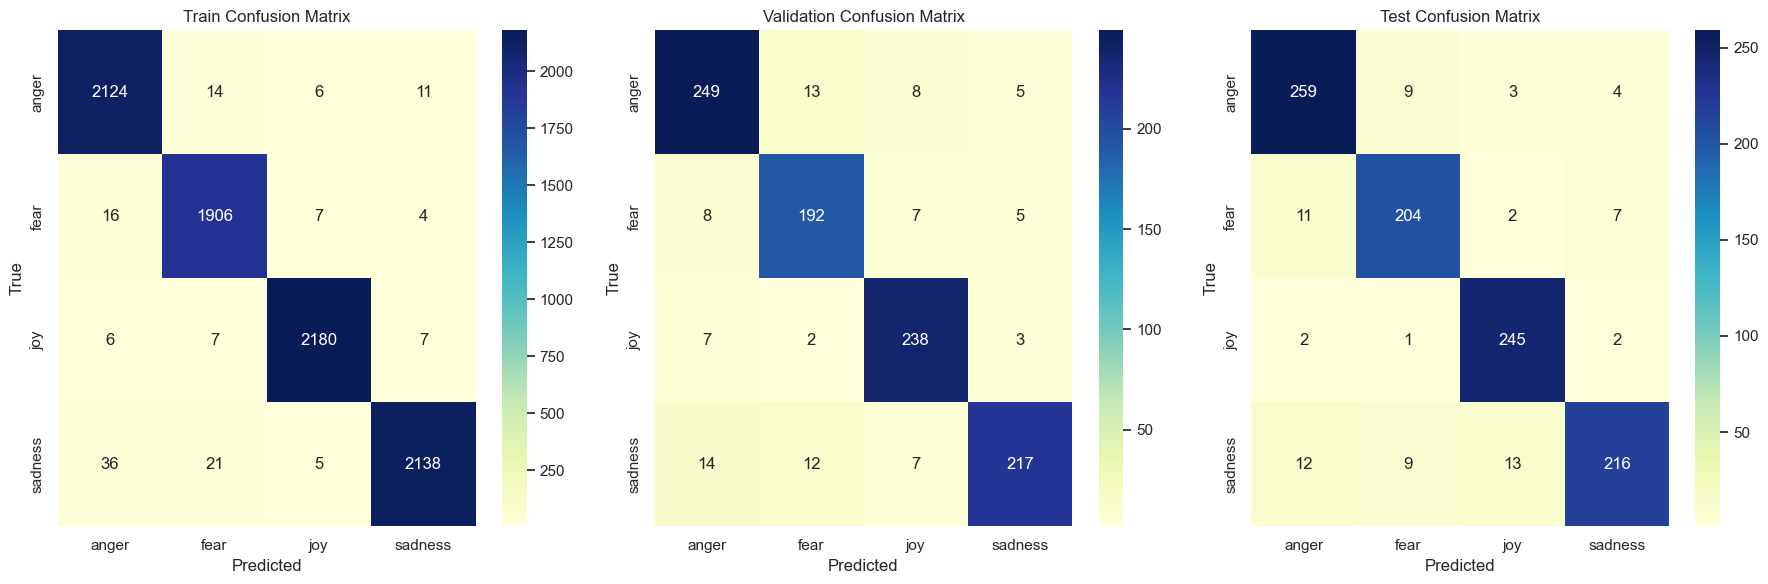

In [58]:
plot_confusion_matrices(
    train_df['Emotion'], train_pred,
    val_df['Emotion'], val_pred,
    test_df['Emotion'], test_pred,
    pipeline.classes_
)

In [59]:
from sklearn.linear_model import LogisticRegression
text_processor = TextProcessor(lower=True, stem=False)

vectorizer = CountVectorizer(max_features=3000)

logistics = LogisticRegression(random_state=42, max_iter=1000)

logs_pipeline = Pipeline([
    ("text_processing", text_processor), # Text processing step
    ("vectorizer", CountVectorizer()),   # CountVectorizer step
    ("classifier", logistics)  # RandomForestClassifier step
])

logs_pipeline.fit(train_df['Text'], train_df['Emotion'])


Pipeline(steps=[('text_processing', TextProcessor(lower=True)),
                ('vectorizer', CountVectorizer()),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [60]:
train_pred = logs_pipeline.predict(x_train_procceced)
train_accuracy = accuracy_score(train_df['Emotion'], train_pred)
print("Train set accuracy:", train_accuracy)

# Validation set accuracy
val_pred = logs_pipeline.predict(x_val_procceced)
val_accuracy = accuracy_score(val_df['Emotion'], val_pred)
print("Validation set accuracy:", val_accuracy)

# Test set accuracy
test_pred = logs_pipeline.predict(x_test_procceced)
test_accuracy = accuracy_score(test_df['Emotion'], test_pred)
print("Test set accuracy:", test_accuracy)

logs_acc = test_accuracy

Train set accuracy: 0.9925777568331763
Validation set accuracy: 0.9209726443768997
Test set accuracy: 0.9269269269269269


In [61]:
heading="Logistic Regression Classifier"
centered_heading=colored(heading,attrs=['bold']).center(80)
print(centered_heading)

report1 = classification_report(train_df['Emotion'], train_pred)
report2 = classification_report(test_df['Emotion'], test_pred)
report3 = classification_report(val_df['Emotion'], val_pred)
print("classification report of train data\n",report1)
print("^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^")
print("classification report of test data \n",report2)
print("^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^")
print("classification report of val data\n",report3)

                     Logistic Regression Classifier                     
classification report of train data
               precision    recall  f1-score   support

       anger       0.99      0.99      0.99      2155
        fear       0.99      0.99      0.99      1933
         joy       1.00      1.00      1.00      2200
     sadness       1.00      0.99      0.99      2200

    accuracy                           0.99      8488
   macro avg       0.99      0.99      0.99      8488
weighted avg       0.99      0.99      0.99      8488

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
classification report of test data 
               precision    recall  f1-score   support

       anger       0.93      0.93      0.93       275
        fear       0.93      0.92      0.92       224
         joy       0.93      0.98      0.95       250
     sadness       0.92      0.88      0.90       250

    accuracy                           0.93     

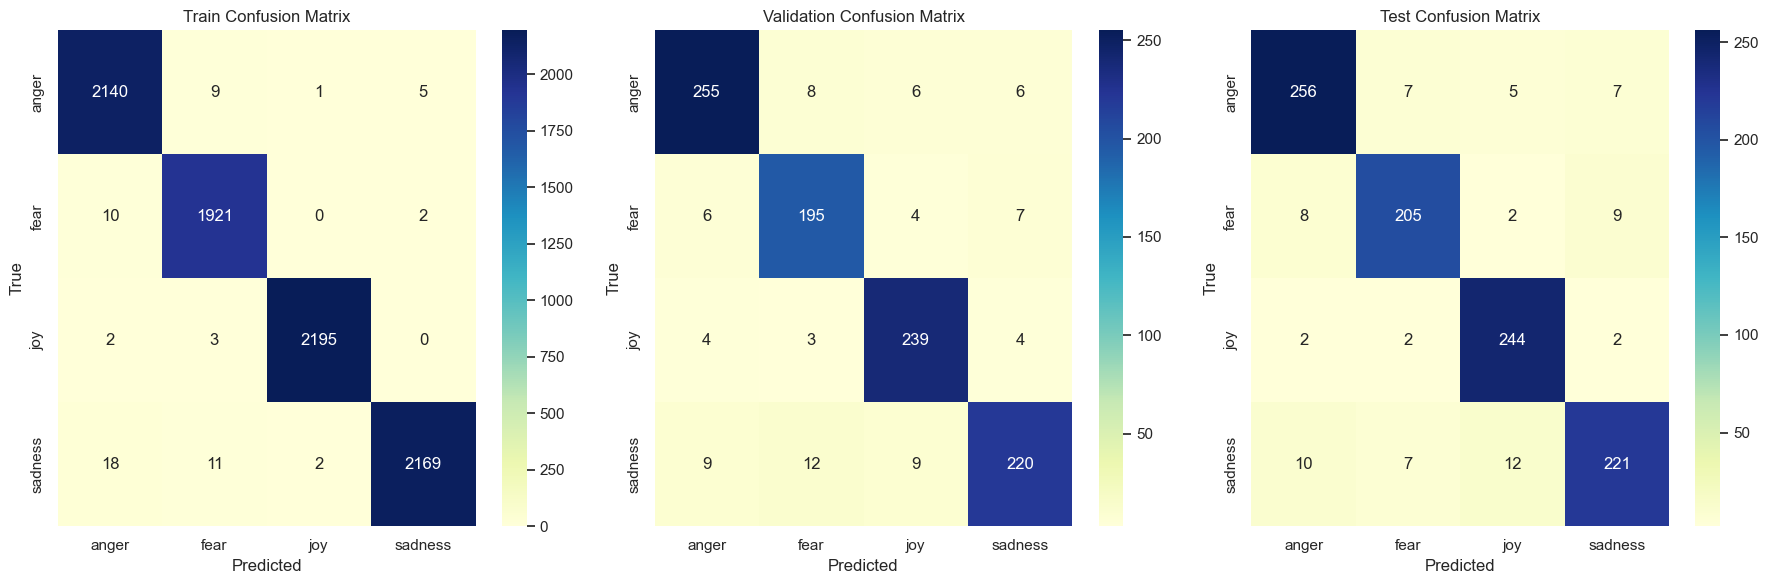

In [62]:
plot_confusion_matrices(
    train_df['Emotion'], train_pred,
    val_df['Emotion'], val_pred,
    test_df['Emotion'], test_pred,
    pipeline.classes_
)

In [63]:
from sklearn.naive_bayes import MultinomialNB
text_processor = TextProcessor(lower=True, stem=True)

vectorizer = CountVectorizer(max_features=3000)

MNB = MultinomialNB()

MNB_pipeline = Pipeline([
    ("text_processing", text_processor), # Text processing step
    ("vectorizer", CountVectorizer()),   # CountVectorizer step
    ("classifier", MNB)  # RandomForestClassifier step
])

MNB_pipeline.fit(train_df['Text'], train_df['Emotion'])


Pipeline(steps=[('text_processing', TextProcessor(lower=True, stem=True)),
                ('vectorizer', CountVectorizer()),
                ('classifier', MultinomialNB())])

In [64]:
train_pred = MNB_pipeline.predict(x_train_procceced)
train_accuracy = accuracy_score(train_df['Emotion'], train_pred)
print("Train set accuracy:", train_accuracy)

# Validation set accuracy
val_pred = MNB_pipeline.predict(x_val_procceced)
val_accuracy = accuracy_score(val_df['Emotion'], val_pred)
print("Validation set accuracy:", val_accuracy)

# Test set accuracy
test_pred = MNB_pipeline.predict(x_test_procceced)
test_accuracy = accuracy_score(test_df['Emotion'], test_pred)
print("Test set accuracy:", test_accuracy)

MNB_acc = test_accuracy

Train set accuracy: 0.9545240339302544
Validation set accuracy: 0.851063829787234
Test set accuracy: 0.8468468468468469


In [65]:
heading="Naive Bayes- Multinominal Classifier"
centered_heading=colored(heading,attrs=['bold']).center(80)
print(centered_heading)

report1 = classification_report(train_df['Emotion'], train_pred)
report2 = classification_report(test_df['Emotion'], test_pred)
report3 = classification_report(val_df['Emotion'], val_pred)
print("classification report of train data\n",report1)
print("^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^")
print("classification report of test data \n",report2)
print("^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^")
print("classification report of val data\n",report3)

                  Naive Bayes- Multinominal Classifier                  
classification report of train data
               precision    recall  f1-score   support

       anger       0.95      0.96      0.95      2155
        fear       0.95      0.96      0.96      1933
         joy       0.98      0.95      0.96      2200
     sadness       0.94      0.96      0.95      2200

    accuracy                           0.95      8488
   macro avg       0.95      0.95      0.95      8488
weighted avg       0.95      0.95      0.95      8488

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
classification report of test data 
               precision    recall  f1-score   support

       anger       0.84      0.86      0.85       275
        fear       0.83      0.82      0.83       224
         joy       0.87      0.89      0.88       250
     sadness       0.85      0.81      0.83       250

    accuracy                           0.85     

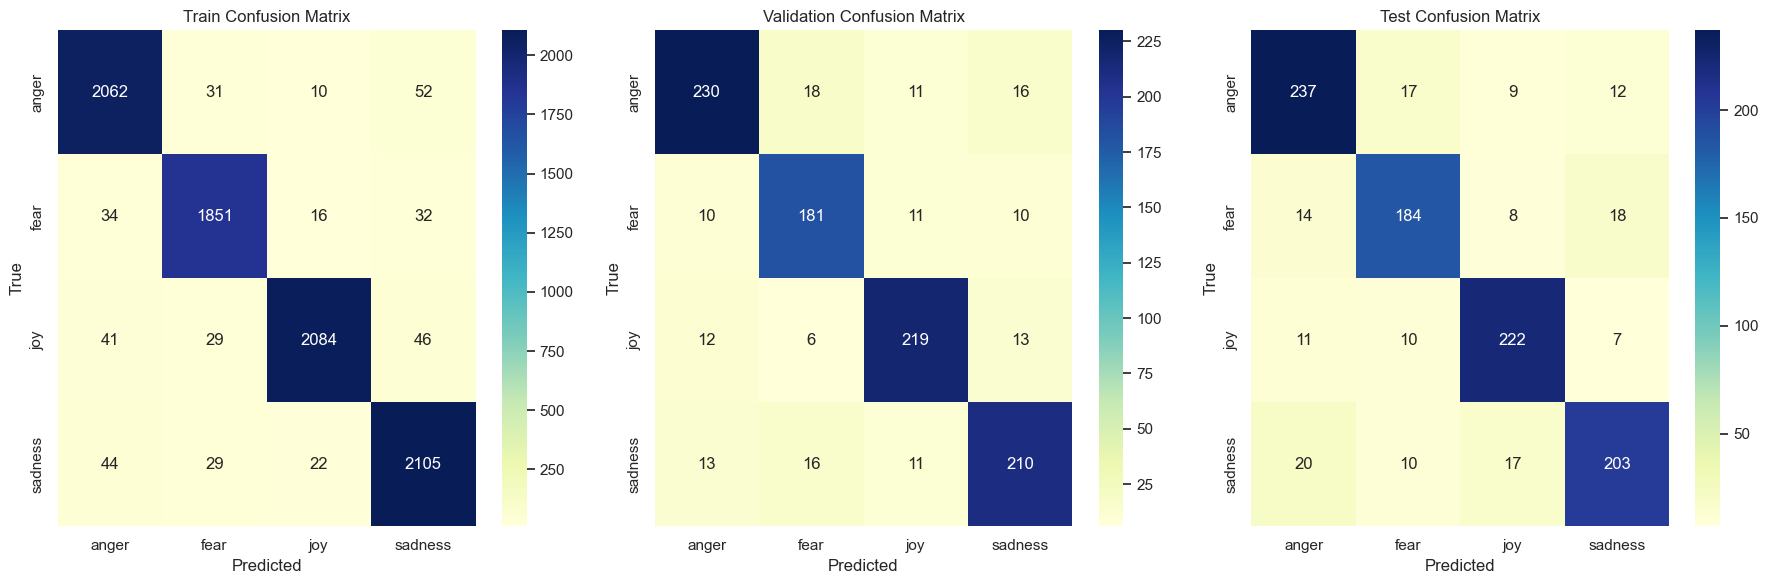

In [66]:
plot_confusion_matrices(
    train_df['Emotion'], train_pred,
    val_df['Emotion'], val_pred,
    test_df['Emotion'], test_pred,
    pipeline.classes_
)

In [67]:
from sklearn.ensemble import GradientBoostingClassifier
text_processor = TextProcessor(lower=True, stem=False)

vectorizer = CountVectorizer(max_features=3000)

GB = GradientBoostingClassifier()

GB_pipeline = Pipeline([
    ("text_processing", text_processor), # Text processing step
    ("vectorizer", CountVectorizer()),   # CountVectorizer step
    ("classifier", GB)  # RandomForestClassifier step
])

GB_pipeline.fit(train_df['Text'], train_df['Emotion'])


Pipeline(steps=[('text_processing', TextProcessor(lower=True)),
                ('vectorizer', CountVectorizer()),
                ('classifier', GradientBoostingClassifier())])

In [68]:
train_pred = GB_pipeline.predict(x_train_procceced)
train_accuracy = accuracy_score(train_df['Emotion'], train_pred)
print("Train set accuracy:", train_accuracy)

# Validation set accuracy
val_pred = GB_pipeline.predict(x_val_procceced)
val_accuracy = accuracy_score(val_df['Emotion'], val_pred)
print("Validation set accuracy:", val_accuracy)

# Test set accuracy
test_pred = GB_pipeline.predict(x_test_procceced)
test_accuracy = accuracy_score(test_df['Emotion'], test_pred)
print("Test set accuracy:", test_accuracy)

GB_acc = test_accuracy

Train set accuracy: 0.897502356267672
Validation set accuracy: 0.85612968591692
Test set accuracy: 0.8718718718718719


In [69]:
heading="Gradient Boosting Classifier"
centered_heading=colored(heading,attrs=['bold']).center(80)
print(centered_heading)


report1 = classification_report(train_df['Emotion'], train_pred)
report2 = classification_report(test_df['Emotion'], test_pred)
report3 = classification_report(val_df['Emotion'], val_pred)
print("classification report of train data\n",report1)
print("^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^")
print("classification report of test data \n",report2)
print("^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^")
print("classification report of val data\n",report3)

                      Gradient Boosting Classifier                      
classification report of train data
               precision    recall  f1-score   support

       anger       0.95      0.88      0.91      2155
        fear       0.96      0.89      0.92      1933
         joy       0.79      0.99      0.88      2200
     sadness       0.93      0.84      0.88      2200

    accuracy                           0.90      8488
   macro avg       0.91      0.90      0.90      8488
weighted avg       0.91      0.90      0.90      8488

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
classification report of test data 
               precision    recall  f1-score   support

       anger       0.94      0.85      0.89       275
        fear       0.93      0.90      0.92       224
         joy       0.75      0.98      0.85       250
     sadness       0.91      0.77      0.83       250

    accuracy                           0.87     

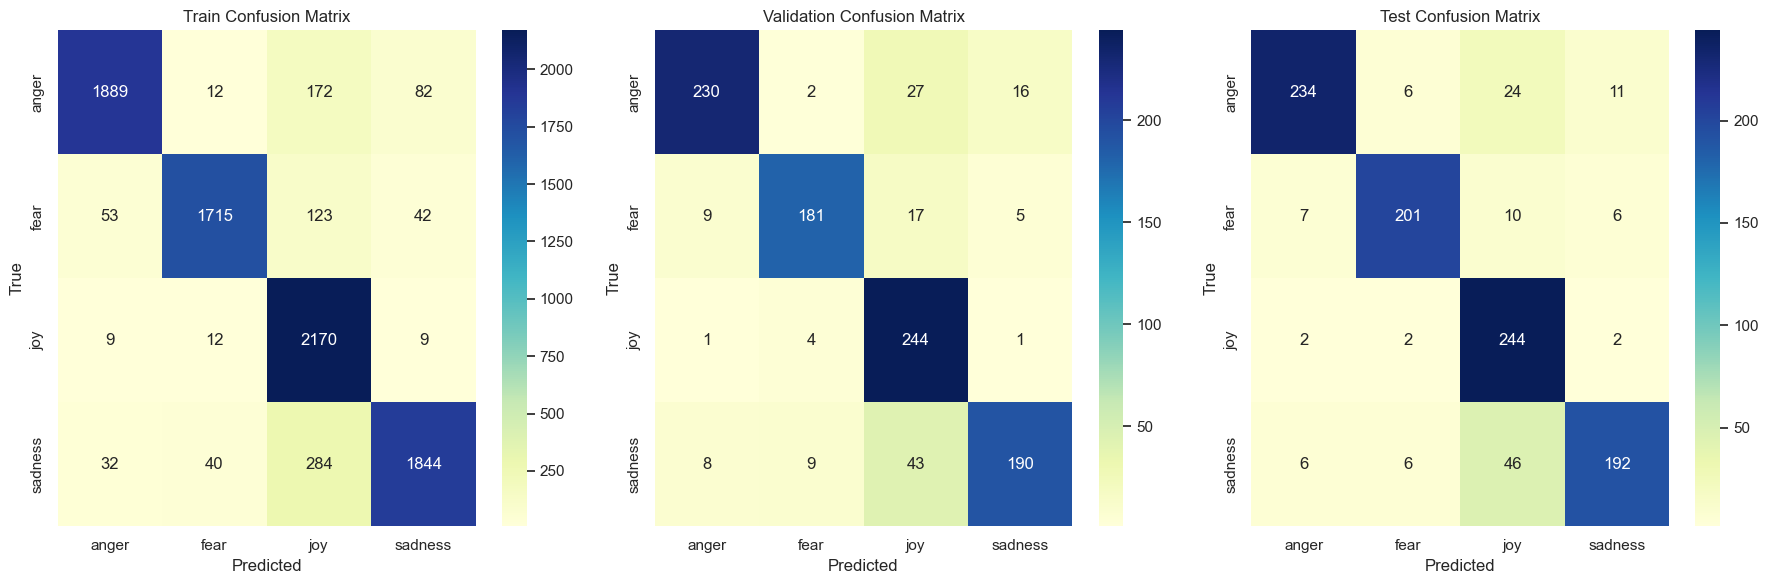

In [70]:
plot_confusion_matrices(
    train_df['Emotion'], train_pred,
    val_df['Emotion'], val_pred,
    test_df['Emotion'], test_pred,
    pipeline.classes_
)

<div style="text-align:center; background-color:yellow; padding:20px;">
  <h1 style="font-size:36px; color:red;"><b>4.Best Model Implementation</b></h1>
</div>


### The code segment creates a bar plot to visualize the accuracies of different machine learning models.

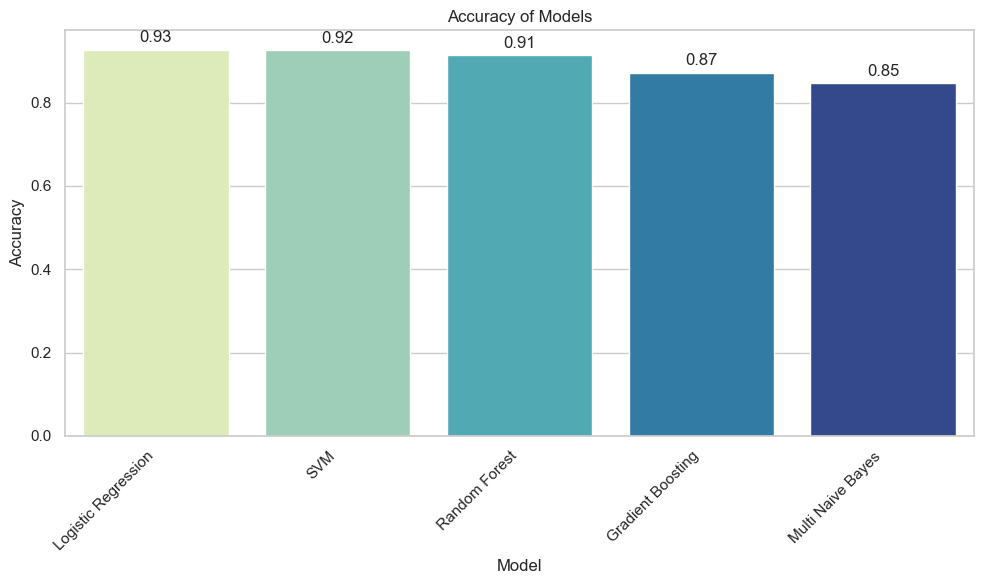

In [71]:
accuracies = {
    "Multi Naive Bayes": MNB_acc,
    "SVM": svm_acc,
    "Random Forest": RF_acc,
    "Logistic Regression": logs_acc,
    "Gradient Boosting": GB_acc
}

# Sort accuracies in descending order
sorted_accuracies = sorted(accuracies.items(), key=lambda x: x[1], reverse=True)

# Extract model names and accuracies
model_names = [model[0] for model in sorted_accuracies]
accuracy_values = [model[1] for model in sorted_accuracies]

# Create countplot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=model_names, y=accuracy_values, palette="YlGnBu")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Accuracy of Models")
plt.xticks(rotation=45, ha='right')

# Annotate each bar with its accuracy value
for i, v in enumerate(accuracy_values):
    ax.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()
#plt.savefig("best_model.png")

### The code uses a technique called "Voting Classifier" to combine predictions from multiple machine learning models. It includes three models: Random Forest Classifier, Logistic Regression, and Support Vector Machine. These models are trained on textual data and corresponding emotions. The Voting Classifier learns from these individual models to make a final prediction.

In [72]:
from sklearn.ensemble import VotingClassifier

estimators=[
        ("RFC", pipeline),
        ("Logistics Regression", logs_pipeline),
        ("SVM", svm_pipeline)]


voting_classifier = VotingClassifier(estimators, voting='hard')
voting_classifier.fit(train_df['Text'], train_df['Emotion'])


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   19.3s finished


VotingClassifier(estimators=[('RFC',
                              Pipeline(steps=[('text_processing',
                                               TextProcessor(lower=True)),
                                              ('vectorizer', CountVectorizer()),
                                              ('classifier',
                                               RandomForestClassifier(n_estimators=50,
                                                                      n_jobs=-1,
                                                                      random_state=42,
                                                                      verbose=1))])),
                             ('Logistics Regression',
                              Pipeline(steps=[('text_processing',
                                               TextProcessor(lower=True)),
                                              ('vectorizer', CountVectorizer()),
                                              ('classifier',
                                               LogisticRegression(max_iter=1000,
                                                                  random_state=42))])),
                             ('SVM',
                              Pipeline(steps=[('text_processing',
                                               TextProcessor(lower=True)),
                                              ('vectorizer',
                                               CountVectorizer(max_features=3000)),
                                              ('svm',
                                               SVC(C=0.5, gamma=1,
                                                   kernel='linear',
                                                   random_state=42))]))])

In [73]:

train_pred = voting_classifier.predict(x_train_procceced)
train_accuracy = accuracy_score(train_df['Emotion'], train_pred)
print("Train set accuracy:", train_accuracy)

# Validation set accuracy
val_pred = voting_classifier.predict(x_val_procceced)
val_accuracy = accuracy_score(val_df['Emotion'], val_pred)
print("Validation set accuracy:", val_accuracy)

# Test set accuracy
test_pred = voting_classifier.predict(x_test_procceced)
test_accuracy = accuracy_score(test_df['Emotion'], test_pred)
print("Test set accuracy:", test_accuracy)

model_accuracy = test_accuracy

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.1s finished


Train set accuracy: 0.9936380772855796


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished


Validation set accuracy: 0.9209726443768997


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished


Test set accuracy: 0.9319319319319319


<div style="text-align:center; background-color:yellow; padding:20px;">
  <h1 style="font-size:36px; color:red;"><b>5.Model Validation </b></h1>
</div>


In [74]:
print('Our Machine Learning model has an accuracy of {:.2f}%'.format(model_accuracy * 100))

Our Machine Learning model has an accuracy of 93.19%


In [75]:
custom_text = "I'm feeling happy and excited today"
predicted_emotion = voting_classifier.predict([custom_text])
print("Predicted Emotion:", predicted_emotion[0])

Predicted Emotion: joy


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished


In [76]:
custom_text = "I'm realy don't even know why this is done for me!"
predicted_emotion = voting_classifier.predict([custom_text])
print("Predicted Emotion:", predicted_emotion[0])

Predicted Emotion: sadness


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished


In [77]:
custom_text = "I feel overwhelmed with sorrow"
predicted_emotion = voting_classifier.predict([custom_text])
print("Predicted Emotion:", predicted_emotion[0])

Predicted Emotion: fear


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
